
<!DOCTYPE html>
<html lang="es">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Presentación</title>
    <style>
        body {
            font-family: Arial, sans-serif;
            margin: 0;
            padding: 0;
        }
        .container {
            text-align: center;
            padding: 20px;
        }
        .logo {
            width: 200px; /* Ajusta el tamaño según necesites */
            height: auto;
        }
        .title {
            font-size: 24px;
            margin-top: 20px;
        }
        .subtitle {
            font-size: 18px;
            margin-top: 10px;
        }
        .info {
            font-size: 16px;
            margin-top: 10px;
        }
    </style>
</head>
<body>
    <div class="container">
        <img src="OIP.jpeg" alt="Logo" class="logo">
        <div class="title">Instituto Tecnológico de las Américas</div>
        <div class="subtitle">Estudiante: Milton Tarsian García Payero</div>
        <div class="info">Matrícula: 2020-10676</div>
        <div class="info">Docente: Gregory Guillermo De La Rosa</div>
        <div class="info">Materia: Analítica Descriptiva</div>
        <div class="info">Tarea: Trabajo Final</div>
        <div class="info">Fecha: 15 de abril del 2024</div>
    </div>
</body>
</html>


# Api de  la SuperIntendencias de Bancos

In [1]:
#Librerías necesarias para seguir el  ejercicio. 
import json
import requests
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt
import math

#Variable para saber si hay más página 
next_page = True
#Página inicial
pagina = 1
#Registros que queremos por petición.
#Seleccionar un número que se adapte a sus necesidades menor a 100k.
registro = 100_000

#Rango de fecha a consultar
periodo_inicial = '2022-01'
periodo_final = '2023-12'

#Endpoint que se consultará
end_point = 'carteras/creditos/clasificacion-riesgo'

#Colopar API KEY personal en la variable headers
headers={
          'Ocp-Apim-Subscription-Key': 'b308e31de8894b1085a24dfb16d2d27e' ,   
          'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Safari/537.36',
}


#Listas que almacenará los datos
registros_list = []

#El ciclo funcionará hasta que se llegue a la última página de la petición
while next_page:
    
    #Concatenamos las variables para formar la url de la consulta
    url = f'https://apis.sb.gob.do/estadisticas/v2/{ end_point }?periodoInicial={ periodo_inicial }&periodoFinal={ periodo_final }&tipoEntidad=BM&paginas={ pagina }&registros={ registro }'

    try:
        #Hacemos la petición
        response  = requests.get(url, headers=headers) 
        #Validamos el estatus de la petición según el protocolo http.
        response.raise_for_status()
        
        #Parseamos la respuesta con los datos a Json
        datos = response.json()
        
        #Agregamos los datos a una lista conformada por dataframes de pandas
        registros_list.append(pd.DataFrame(datos))
    
        #Obtenemos los metadatos que necesitamos, los cuales decribimos más arriba en el artículo.    
        #Parseamos
        metadatos = json.loads(response.headers['x-pagination'])
        
        #Obtebemos los metadatos necesarios
        next_page = metadatos['HasNext']
        total_pages =  metadatos['TotalPages']
        total_record = metadatos["TotalRecords"]
        
        #Imprimimos la página actual y el total de página
        print('Pagina:',pagina,'/',total_pages)
        
        #Incrementamos 1 para ir a la siguiente página
        pagina +=1
        
    except requests.exceptions.HTTPError as errh:
        print("Error HTTP:", errh)
        raise errh
    except requests.exceptions.ConnectionError as errc:
        print("Error de conexión:", errc)
        raise errc
    except requests.exceptions.Timeout as errt:
        print("Error Timeout:", errt)
        raise errt
    except requests.exceptions.RequestException as err:
        print("Algo salío mal:", err)
        raise err
        
#Concatenamos la lista de dataframes en uno solo       
registros = pd.concat(registros_list, ignore_index=True)

#Vemos los primeros cinco regístros del dataframe
registros.head(10)


Pagina: 1 / 1


,periodo,tipoEntidad,entidad,clasificacionRiesgo,tipoCartera,cantidadPlastico,cantidadCredito,deuda,tasaPorDeuda,tasaPromedioPonderado,deudaCapital,deudaVencida,deudaVencidaDe31A90Dias,valorDesembolso,valorGarantia,valorProvisionCapitalYRendimiento
0,2022-01,BANCOS MÚLTIPLES,SANTA CRUZ,D1,Tarjetas de créditos,937,1003,3.753642e+07,1.978765e+09,52.715873,3.347082e+07,3.489398e+07,328465.37,33470816.95,0.000000e+00,1.348880e+07
1,2022-01,BANCOS MÚLTIPLES,ACTIVO,C,Créditos de consumo,0,30,1.699926e+06,3.526528e+07,20.745187,1.630297e+06,5.574082e+05,557408.16,0.00,0.000000e+00,3.399852e+05
2,2022-01,BANCOS MÚLTIPLES,VIMENCA,B,Créditos comerciales,9,65,6.500311e+08,4.447871e+09,6.842551,6.475394e+08,1.890179e+06,1890178.53,21108165.42,4.067602e+08,1.136573e+07
3,2022-01,BANCOS MÚLTIPLES,BLH,C,Créditos de consumo,0,30,1.972650e+06,3.733011e+07,18.923836,1.913132e+06,4.065154e+05,406515.39,7500.00,0.000000e+00,3.945299e+05
4,2022-01,BANCOS MÚLTIPLES,BHD,C,Créditos de consumo,0,3245,8.616418e+08,1.419158e+10,16.470398,8.313838e+08,2.798845e+07,27988450.60,15916700.23,8.197528e+07,1.605002e+08
5,2022-01,BANCOS MÚLTIPLES,BLH,B,Créditos Hipotecarios,0,7,5.622880e+07,6.274072e+08,11.158112,5.536904e+07,2.926135e+05,292613.47,0.00,5.622880e+07,5.622880e+05
6,2022-01,BANCOS MÚLTIPLES,ACTIVO,E,Tarjetas de créditos,111,90,1.367930e+07,6.930010e+08,50.660540,9.635246e+06,1.367875e+07,0.00,0.00,0.000000e+00,9.635438e+06
7,2022-01,BANCOS MÚLTIPLES,CARIBE,E,Créditos de consumo,0,713,2.209601e+08,3.990953e+09,18.061874,2.036039e+08,1.967798e+08,336149.27,4681455.36,9.030375e+05,2.038337e+08
8,2022-01,BANCOS MÚLTIPLES,VIMENCA,A,Créditos comerciales,58,298,2.163423e+09,1.635720e+10,7.560797,2.157224e+09,0.000000e+00,0.00,89170000.11,3.017202e+08,2.163423e+07
9,2022-01,BANCOS MÚLTIPLES,SANTA CRUZ,E,Créditos comerciales,44,96,1.378931e+08,2.189651e+09,15.879338,1.328360e+08,8.277216e+07,720734.07,4151260.22,1.683893e+07,1.236210e+08


# TEMA Y PROBLEMATICA
### Análisis de las instituciones financieras de la República Dominicana. (Bancos múltiples)Analizar los años desde enero 2022 hasta diciembre 2023. Y realizar lo siguiente en Python utilizando pandas, numpy y matplotlib:


#### 1- Analizar la evolución de cartera de crédito total 

+---------+---------------+
| periodo | cartera_total |
+---------+---------------+
| 2022-01 |    3723649    |
| 2022-02 |    3817043    |
| 2022-03 |    3817782    |
| 2022-04 |    3891553    |
| 2022-05 |    3926032    |
| 2022-06 |    4007912    |
| 2022-07 |    4097085    |
| 2022-08 |    4145807    |
| 2022-09 |    4203331    |
| 2022-10 |    4294307    |
| 2022-11 |    4433193    |
| 2022-12 |    4376891    |
| 2023-01 |    4462740    |
| 2023-02 |    4569836    |
| 2023-03 |    4606843    |
| 2023-04 |    4697776    |
| 2023-05 |    4782086    |
| 2023-06 |    4876765    |
| 2023-07 |    4991787    |
| 2023-08 |    5085822    |
| 2023-09 |    5208072    |
| 2023-10 |    5299544    |
| 2023-11 |    5452594    |
| 2023-12 |    5369058    |
+---------+---------------+


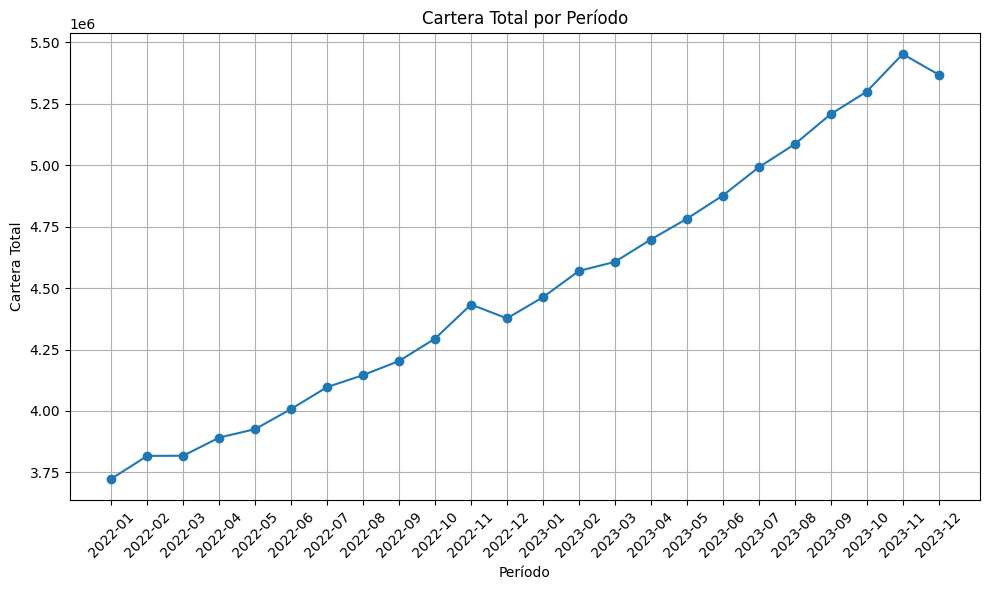

In [2]:
# Agrupamos los datos por periodo y sumamos la columna cantidadCredito
cartera_total_por_periodo = registros.groupby('periodo')['cantidadCredito'].sum().reset_index()

# Renombramos la columna 
cartera_total_por_periodo = cartera_total_por_periodo.rename(columns={'cantidadCredito': 'cartera_total'})


tabla_formato = cartera_total_por_periodo.values.tolist()


headers = cartera_total_por_periodo.columns.tolist()

# Imprimir el DataFrame utilizando tabulate
print(tabulate(tabla_formato, headers=headers, tablefmt='pretty'))

periodo = cartera_total_por_periodo['periodo']
cartera_total = cartera_total_por_periodo['cartera_total']


plt.figure(figsize=(10, 6))
plt.plot(periodo, cartera_total, marker='o', linestyle='-')


plt.title('Cartera Total por Período')
plt.xlabel('Período')
plt.ylabel('Cartera Total')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


#### 2- Analizar la evolución de las carteras de crédito (Hipotecarios, Consumo, Tarjetas y Comerciales)


+---------+-----------------------+----------------------+---------------------+----------------------+
| Periodo | Créditos Hipotecarios | Créditos comerciales | Créditos de consumo | Tarjetas de créditos |
+---------+-----------------------+----------------------+---------------------+----------------------+
| 2022-01 |         72723         |        359819        |       1570690       |       1720417        |
| 2022-02 |         73141         |        406120        |       1589271       |       1748511        |
| 2022-03 |         73437         |        381379        |       1604466       |       1758500        |
| 2022-04 |         73700         |        407173        |       1625180       |       1785500        |
| 2022-05 |         74045         |        367989        |       1657838       |       1826160        |
| 2022-06 |         74439         |        394141        |       1692417       |       1846915        |
| 2022-07 |         74776         |        414954        |      

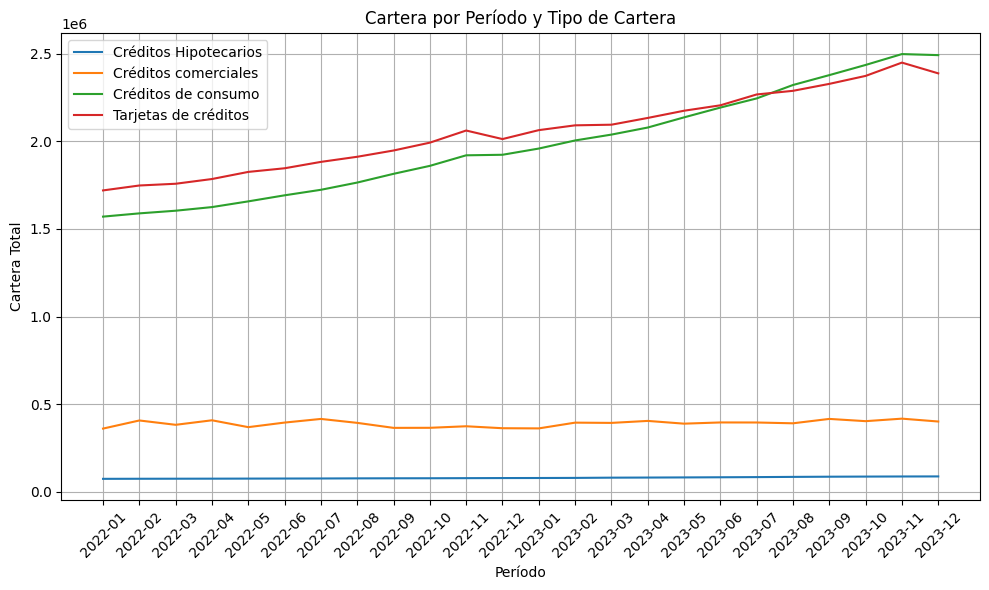

In [3]:
# Agrupamos por periodo y tipoCartera, y sumar la columna cantidadCredito
cartera_por_periodo_tipo = registros.groupby(['periodo', 'tipoCartera'])['cantidadCredito'].sum().reset_index()

# Pivoteamos el DataFrame para tener un periodo por fila y un tipoCartera por columna
cartera_por_periodo_tipo = cartera_por_periodo_tipo.pivot(index='periodo', columns='tipoCartera', values='cantidadCredito')

# Rellenamoi los valores faltantes con 0
cartera_por_periodo_tipo = cartera_por_periodo_tipo.fillna(0)


tabla_formato = cartera_por_periodo_tipo.reset_index().values.tolist()


headers = ['Periodo'] + list(cartera_por_periodo_tipo.columns)


print(tabulate(tabla_formato, headers=headers, tablefmt='pretty'))

plt.figure(figsize=(10, 6))


for tipo_cartera in cartera_por_periodo_tipo.columns:
    plt.plot(cartera_por_periodo_tipo.index, cartera_por_periodo_tipo[tipo_cartera], label=tipo_cartera)


plt.title('Cartera por Período y Tipo de Cartera')
plt.xlabel('Período')
plt.ylabel('Cartera Total')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()


plt.show()

#### 3- ¿Cuántas entidades se están evaluando?


In [4]:

entidades_unicas = registros['entidad'].unique()

num_entidades = len(entidades_unicas)

tabla_entidades = [["Número de entidades:", num_entidades], ["Entidades:", ", ".join(entidades_unicas)]]

print(tabulate(tabla_entidades, tablefmt='pretty'))



+----------------------+---------------------------------------------------------------------------------------------------------------------------------------------+
| Número de entidades: |                                                                     16                                                                      |
|      Entidades:      | VIMENCA, CARIBE, ADEMI, POPULAR, BLH, BANRESERVAS, BHD, SANTA CRUZ, PROMERICA, BANESCO, BELLBANK, SCOTIABANK, ACTIVO, BDI, LAFISE, CITIBANK |
+----------------------+---------------------------------------------------------------------------------------------------------------------------------------------+


#### 4- Cual entidad ha evolucionado más a nivel de monto de cartera

La entidad que ha evolucionado más a nivel de monto de cartera es: BANRESERVAS


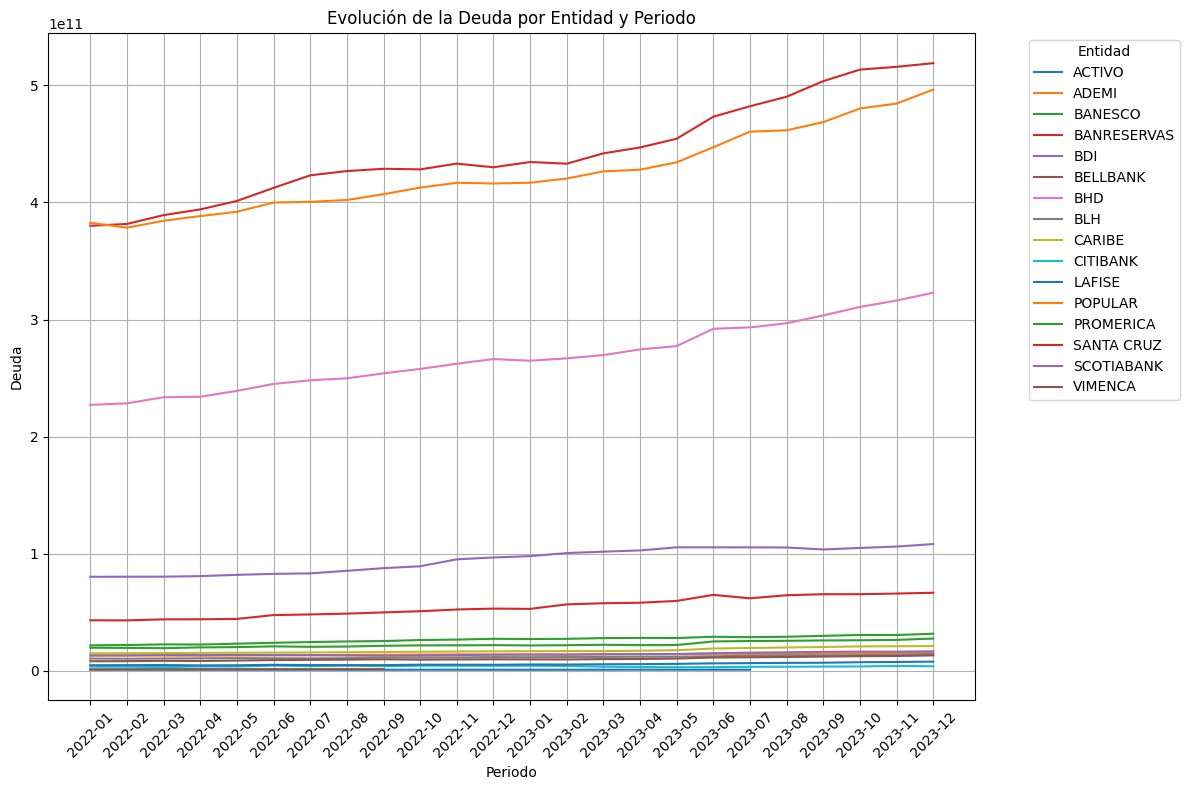

In [5]:
# Agrupamos por entidad y periodo, y sumar la columna deuda
cartera_por_entidad_periodo = registros.groupby(['entidad', 'periodo'])['deuda'].sum().reset_index()

# Calculamos la diferencia máxima por entidad utilizando expresiones lambda
evolucion_cartera = cartera_por_entidad_periodo.groupby('entidad')['deuda'].apply(lambda x: x.max() - x.min())

# Identificamos la entidad con la mayor evolución
entidad_mayor_evolucion = evolucion_cartera.idxmax()

print(f"La entidad que ha evolucionado más a nivel de monto de cartera es: {entidad_mayor_evolucion}")

cartera_por_entidad_periodo = registros.groupby(['entidad', 'periodo'])['deuda'].sum().reset_index()


plt.figure(figsize=(12, 8))

# Iteramos sobre cada entidad
for entidad in cartera_por_entidad_periodo['entidad'].unique():
    # Filtramos los datos para la entidad actual
    datos_entidad = cartera_por_entidad_periodo[cartera_por_entidad_periodo['entidad'] == entidad]
    # Creamos el gráfico de líneas para la entidad actual
    plt.plot(datos_entidad['periodo'], datos_entidad['deuda'], label=entidad)

# Personalizamos el gráfico
plt.title('Evolución de la Deuda por Entidad y Periodo')
plt.xlabel('Periodo')
plt.ylabel('Deuda')
plt.legend(title='Entidad', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Mostramos el gráfico
plt.show()

#### 5- Analizar la clasificación de riesgo de las entidades sabiendo que A es menor que E

In [6]:
# Agrupamos por entidad y clasificacionRiesgo, y sumar la columna deuda
riesgo_por_entidad = registros.groupby(['entidad', 'clasificacionRiesgo'])['deuda'].sum().reset_index()

# Pivoteamos el DataFrame para tener un periodo por fila y una clasificacionRiesgo por columna
riesgo_por_entidad = riesgo_por_entidad.pivot(index='entidad', columns='clasificacionRiesgo', values='deuda')

# Rellenamos los valores faltantes con 0
riesgo_por_entidad = riesgo_por_entidad.fillna(0)

# Aplicamos un formato de visualización a los valores numéricos
riesgo_por_entidad = riesgo_por_entidad.applymap(lambda x: '{:,.0f}'.format(x))

# Convertimos el DataFrame a un formato adecuado para tabulate
tabla_formato = riesgo_por_entidad.reset_index().values.tolist()

# Obtenemos los nombres de las columnas y agregar "Entidad" como encabezado de fila
headers = ['Entidad'] + list(riesgo_por_entidad.columns)

# Imprimimos el DataFrame utilizando tabulate
print(tabulate(tabla_formato, headers=headers, tablefmt='pretty'))

+-------------+-------------------+-------------------+-----------------+-----------------+-----------------+----------------+
|   Entidad   |         A         |         B         |        C        |       D1        |       D2        |       E        |
+-------------+-------------------+-------------------+-----------------+-----------------+-----------------+----------------+
|   ACTIVO    |  17,145,482,206   |   1,076,867,295   |   317,059,616   |   362,204,187   |   311,411,796   |  732,056,937   |
|    ADEMI    |  298,517,118,195  |  24,512,041,889   |  4,482,576,330  |  3,723,300,333  |  2,889,673,127  | 4,017,904,177  |
|   BANESCO   |  404,473,181,106  |  71,132,489,028   | 14,714,537,038  | 13,130,216,157  | 30,027,913,075  | 8,597,432,423  |
| BANRESERVAS | 7,702,411,957,471 | 1,582,593,438,364 | 378,748,610,909 | 204,754,082,218 | 673,198,607,898 | 95,809,115,514 |
|     BDI     |  227,276,021,100  |  50,212,539,502   | 18,311,526,171  | 11,705,649,013  | 30,110,825,999  | 7

C:\Users\DELL\AppData\Local\Temp\ipykernel_29184\11875656.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  riesgo_por_entidad = riesgo_por_entidad.applymap(lambda x: '{:,.0f}'.format(x))


#### 6- Calcular la morosidad de cada una de las entidades (deudavencida / deuda) y hacer un análisis de su comportamiento


In [7]:
# Agrupamos por entidad y sumar deuda y deudaVencida
morosidad_por_entidad = registros.groupby('entidad')[['deuda', 'deudaVencida']].sum().reset_index()

# Calculamos la morosidad
morosidad_por_entidad['morosidad'] = morosidad_por_entidad['deudaVencida'] / morosidad_por_entidad['deuda']

# Aplicamos un formato de visualización a las columnas 'deuda' y 'deudaVencida'
morosidad_por_entidad['deuda'] = morosidad_por_entidad['deuda'].map('{:,.0f}'.format)
morosidad_por_entidad['deudaVencida'] = morosidad_por_entidad['deudaVencida'].map('{:,.0f}'.format)


tabla_formato = morosidad_por_entidad.values.tolist()

headers = morosidad_por_entidad.columns.tolist()


print(tabulate(tabla_formato, headers=headers, tablefmt='pretty'))

+-------------+--------------------+----------------+-----------------------+
|   entidad   |       deuda        |  deudaVencida  |       morosidad       |
+-------------+--------------------+----------------+-----------------------+
|   ACTIVO    |   19,945,082,037   | 1,370,106,524  |  0.06869395280302501  |
|    ADEMI    |  338,142,614,051   | 9,085,329,283  | 0.026868335743331234  |
|   BANESCO   |  542,075,768,829   | 11,845,214,936 |  0.02185158536343622  |
| BANRESERVAS | 10,637,515,812,374 | 85,162,227,527 | 0.008005837925844047  |
|     BDI     |  344,622,273,806   | 5,306,817,213  | 0.015398938537608662  |
|  BELLBANK   |   13,480,700,839   |  174,647,704   | 0.012955387565515591  |
|     BHD     | 6,435,621,068,684  | 96,846,123,686 | 0.015048450282025559  |
|     BLH     |  286,176,156,308   | 3,355,871,021  | 0.011726591985754932  |
|   CARIBE    |  417,672,025,492   | 9,784,441,353  |  0.02342613523512119  |
|  CITIBANK   |   93,731,794,110   |  125,438,040   | 0.00133826

#### 7- Calcular la morosidad de cada una de las entidades por tipo de carteras (Hipotecarios, Consumo, Tarjetas y Comerciales) y hacer un análisis de su comportamiento


In [8]:
# Agrupamos por entidad, tipoCartera y sumar deuda y deudaVencida
morosidad_por_entidad_cartera = registros.groupby(['entidad', 'tipoCartera'])[['deuda', 'deudaVencida']].sum().reset_index()

# Calculamos la morosidad
morosidad_por_entidad_cartera['morosidad'] = morosidad_por_entidad_cartera['deudaVencida'] / morosidad_por_entidad_cartera['deuda']

# Pivoteamos el DataFrame para tener una entidad por fila y un tipoCartera por columna
morosidad_por_entidad_cartera = morosidad_por_entidad_cartera.pivot(index='entidad', columns='tipoCartera', values='morosidad')

# Rellenamos los valores faltantes con 0
morosidad_por_entidad_cartera = morosidad_por_entidad_cartera.fillna(0)


tabla_formato = morosidad_por_entidad_cartera.reset_index().values.tolist()


headers = ['Entidad'] + list(morosidad_por_entidad_cartera.columns)


print(tabulate(tabla_formato, headers=headers, tablefmt='pretty'))

+-------------+-----------------------+-----------------------+----------------------+----------------------+
|   Entidad   | Créditos Hipotecarios | Créditos comerciales  | Créditos de consumo  | Tarjetas de créditos |
+-------------+-----------------------+-----------------------+----------------------+----------------------+
|   ACTIVO    |  0.00254862957689937  |  0.07324612952042578  | 0.05592140888382783  | 0.15517398193050158  |
|    ADEMI    | 0.0002939940589145234 | 0.028363505594151527  | 0.023447200601091723 | 0.09482056245959627  |
|   BANESCO   | 0.009993378527495891  | 0.011142697058193879  | 0.044587622788576496 | 0.05810415809003357  |
| BANRESERVAS | 0.006407328440273848  | 0.004531259603629817  | 0.015624660214558779 | 0.021405393962146968 |
|     BDI     |  0.01330086914977754  | 0.015036508476324968  | 0.016866369001060928 | 0.02908207979932632  |
|  BELLBANK   |  0.06909929748063368  | 0.004693158699119898  | 0.03464116596299262  |         0.0          |
|     BHD 

#### 8- A nivel de monto de cartera menciona el ranking 5 de entidades

In [9]:
# Agrupamos por entidad y sumar la columna deuda
cartera_por_entidad = registros.groupby('entidad')['deuda'].sum().reset_index()

# Ordenamos de mayor a menor según el monto de deuda
cartera_por_entidad = cartera_por_entidad.sort_values(by='deuda', ascending=False)

# Aplicamos un formato de visualización a la columna deuda
cartera_por_entidad['deuda'] = cartera_por_entidad['deuda'].map('{:,.0f}'.format)

# Seleccionamos las 5 primeras entidades del ranking
top_5_entidades = cartera_por_entidad.head(5)


tabla_formato = top_5_entidades.values.tolist()

headers = top_5_entidades.columns.tolist()


print(tabulate(tabla_formato, headers=headers, tablefmt='pretty', showindex=False))


+-------------+--------------------+
|   entidad   |       deuda        |
+-------------+--------------------+
| BANRESERVAS | 10,637,515,812,374 |
|   POPULAR   | 10,206,388,294,086 |
|     BHD     | 6,435,621,068,684  |
| SCOTIABANK  | 2,274,198,345,636  |
| SANTA CRUZ  | 1,311,747,843,413  |
+-------------+--------------------+


#### 9- Tabulación de datos estadísticos

##### a. Tomar las columnas de Entidad y cantidad de créditos

##### b. Crear el rango o recorrido de la cantidad de créditos

In [12]:
# Agrupar por 'Entidad' y calcular el rango de 'cantidadCredito'
rango_creditos_por_entidad = registros.groupby('entidad')['cantidadCredito'].agg(['max', 'min'])

# Calcular el rango como la diferencia entre el máximo y el mínimo
rango_creditos_por_entidad['Rango'] = rango_creditos_por_entidad['max'] - rango_creditos_por_entidad['min']

# Seleccionamos solo la columna 'Rango'
rango_creditos_por_entidad = rango_creditos_por_entidad['Rango']

tabla_formato = rango_creditos_por_entidad.reset_index().values.tolist()


headers = rango_creditos_por_entidad.reset_index().columns.tolist()


print(tabulate(tabla_formato, headers=headers, tablefmt='pretty', showindex=False))



+-------------+--------+
|   entidad   | Rango  |
+-------------+--------+
|   ACTIVO    |  6309  |
|    ADEMI    | 94061  |
|   BANESCO   | 55959  |
| BANRESERVAS | 985205 |
|     BDI     |  9860  |
|  BELLBANK   |  2433  |
|     BHD     | 394967 |
|     BLH     |  8092  |
|   CARIBE    | 64515  |
|  CITIBANK   |  729   |
|   LAFISE    |  1177  |
|   POPULAR   | 487623 |
|  PROMERICA  | 75648  |
| SANTA CRUZ  | 261735 |
| SCOTIABANK  | 197413 |
|   VIMENCA   | 24062  |
+-------------+--------+


##### c. Calcular el número de intervalos o clases

In [13]:

#uscamos el numero de netidades unicas
num_entidades = len(registros['entidad'].unique())
print(f"Número de entidades: {num_entidades}")

# Calculamos el número de intervalos o clases (fórmula de Sturges)
num_intervalos = 1 + 3.322 * math.log10(num_entidades)
num_intervalos = int(num_intervalos)  # Convertimos a entero
print(f"Número de intervalos o clases: {num_intervalos}")


Número de entidades: 16
Número de intervalos o clases: 5


##### d. Calcular la amplitud del intervalo de clase

In [14]:
cantidad_creditos_por_entidad = registros.groupby('entidad')['cantidadCredito'].sum()

#  calculamos el rango de los datos y la amplitud del intervalo de clase
rango_datos = cantidad_creditos_por_entidad.max() - cantidad_creditos_por_entidad.min()
amplitud_intervalo = rango_datos / num_intervalos

print(f"Amplitud del intervalo de clase: {amplitud_intervalo}")



Amplitud del intervalo de clase: 8146183.4


##### e. Calcular los límites del intervalo


In [15]:
limites_intervalos = []
limite_inferior = registros['cantidadCredito'].min()
for i in range(num_intervalos):
    limite_superior = limite_inferior + amplitud_intervalo
    limites_intervalos.append((limite_inferior, limite_superior))
    limite_inferior = limite_superior


intervalos_formateados = [f"Intervalo {i+1}: [{lim_inf:.2f}, {lim_sup:.2f})" for i, (lim_inf, lim_sup) in enumerate(limites_intervalos)]


filas = [[intervalo] for intervalo in intervalos_formateados]


print(tabulate(filas, headers=['Límites de los intervalos de clase'], tablefmt='pretty', showindex=False))


+-----------------------------------------+
|   Límites de los intervalos de clase    |
+-----------------------------------------+
|     Intervalo 1: [1.00, 8146184.40)     |
| Intervalo 2: [8146184.40, 16292367.80)  |
| Intervalo 3: [16292367.80, 24438551.20) |
| Intervalo 4: [24438551.20, 32584734.60) |
| Intervalo 5: [32584734.60, 40730918.00) |
+-----------------------------------------+


##### f. Calcular la tabulación

In [16]:
# Segmentamos los datos en intervalos de clase usando pd.cut()
registros['Intervalo_Clase'] = pd.cut(registros['cantidadCredito'], bins=num_intervalos)

# Contamos cuántos valores caen en cada intervalo de clase
tabulacion = registros['Intervalo_Clase'].value_counts().sort_index()

# Formateamos la tabulación
tabulacion_formateada = tabulacion.reset_index()
tabulacion_formateada.columns = ['Intervalo de Clase', 'Frecuencia']

# Imprimimos la tabulación
print(tabulate(tabulacion_formateada, headers='keys', tablefmt='pretty', showindex=False))






+----------------------+------------+
|  Intervalo de Clase  | Frecuencia |
+----------------------+------------+
| (-984.236, 197048.2] |    7412    |
| (197048.2, 394095.4] |     85     |
| (394095.4, 591142.6] |     20     |
| (591142.6, 788189.8] |     28     |
| (788189.8, 985237.0] |     17     |
+----------------------+------------+


##### g. Calcular la marca de la clase o punto medio


In [17]:
# Calculamos la marca de clase para cada intervalo de clase
marca_clase = [(lim_inf + lim_sup) / 2 for lim_inf, lim_sup in limites_intervalos]

# Creamos un DataFrame para mostrar la marca de clase junto con los intervalos de clase y la tabulación
marca_clase_df = pd.DataFrame({'Intervalo de Clase': intervalos_formateados, 'Marca de Clase': marca_clase})

# Imprimimos la tabla formateada
print(tabulate(marca_clase_df, headers='keys', tablefmt='pretty', showindex=False))




+-----------------------------------------+--------------------+
|           Intervalo de Clase            |   Marca de Clase   |
+-----------------------------------------+--------------------+
|     Intervalo 1: [1.00, 8146184.40)     |     4073092.7      |
| Intervalo 2: [8146184.40, 16292367.80)  | 12219276.100000001 |
| Intervalo 3: [16292367.80, 24438551.20) |     20365459.5     |
| Intervalo 4: [24438551.20, 32584734.60) | 28511642.900000002 |
| Intervalo 5: [32584734.60, 40730918.00) |     36657826.3     |
+-----------------------------------------+--------------------+


##### h. Presentar la tabla de frecuencia 

In [18]:
# Creamos un DataFrame para mostrar la marca de clase junto con los intervalos de clase y la tabulación
marca_clase_df = pd.DataFrame({'Intervalo de Clase': intervalos_formateados, 
                               'Marca de Clase': marca_clase, 
                               'Frecuencia': tabulacion})

# Imprimimos la tabla formateada
print(tabulate(marca_clase_df, headers='keys', tablefmt='pretty', showindex=False))



+-----------------------------------------+--------------------+------------+
|           Intervalo de Clase            |   Marca de Clase   | Frecuencia |
+-----------------------------------------+--------------------+------------+
|     Intervalo 1: [1.00, 8146184.40)     |     4073092.7      |    7412    |
| Intervalo 2: [8146184.40, 16292367.80)  | 12219276.100000001 |     85     |
| Intervalo 3: [16292367.80, 24438551.20) |     20365459.5     |     20     |
| Intervalo 4: [24438551.20, 32584734.60) | 28511642.900000002 |     28     |
| Intervalo 5: [32584734.60, 40730918.00) |     36657826.3     |     17     |
+-----------------------------------------+--------------------+------------+


#### 10- Realizar los siguientes gráficos

##### a. Grafico de columnas mostrando la morosidad del año 2023 por mes para cada una de las entidades


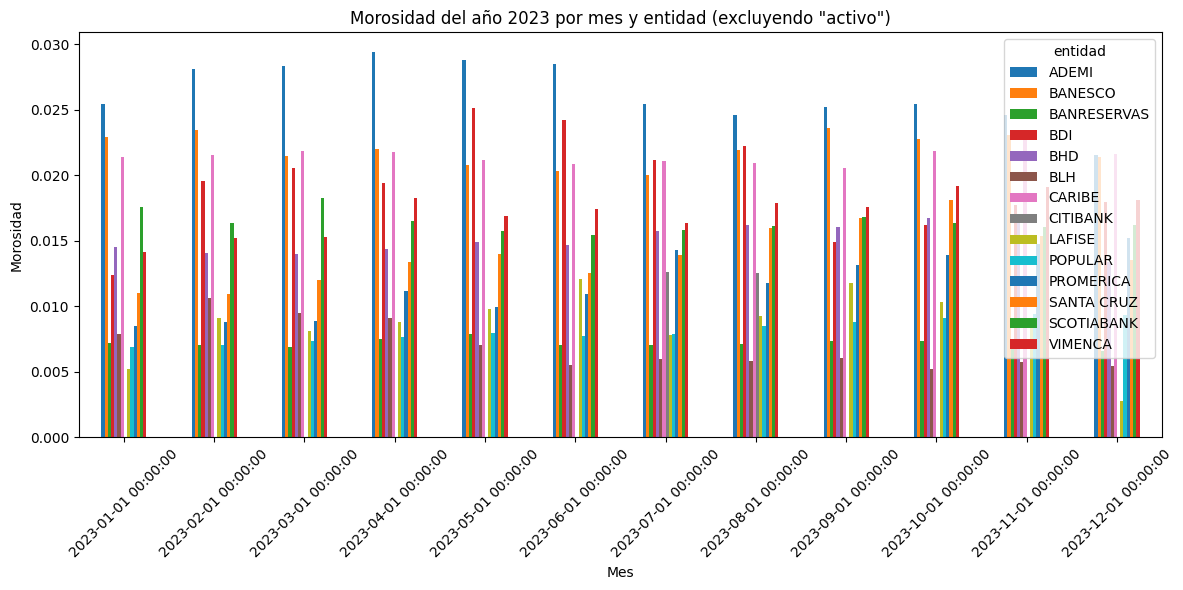

In [19]:

registros['periodo'] = pd.to_datetime(registros['periodo'])


registros_2023_sin_activo = registros[(registros['periodo'].dt.year == 2023) & (registros['entidad'] != 'ACTIVO')]


morosidad_por_entidad_periodo = registros_2023_sin_activo.groupby(['entidad', 'periodo'])[['deudaVencida', 'deuda']].sum().reset_index()
morosidad_por_entidad_periodo['morosidad'] = morosidad_por_entidad_periodo['deudaVencida'] / morosidad_por_entidad_periodo['deuda']


morosidad_por_entidad_periodo = morosidad_por_entidad_periodo.pivot(index='periodo', columns='entidad', values='morosidad')


fig, ax = plt.subplots(figsize=(12, 6))
morosidad_por_entidad_periodo.plot(kind='bar', ax=ax)
ax.set_title('Morosidad del año 2023 por mes y entidad (excluyendo "activo")')
ax.set_xlabel('Mes')
ax.set_ylabel('Morosidad')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### b. Grafico de barras mostrando el monto de deuda para el mes 12 del 2023 para cada entidad


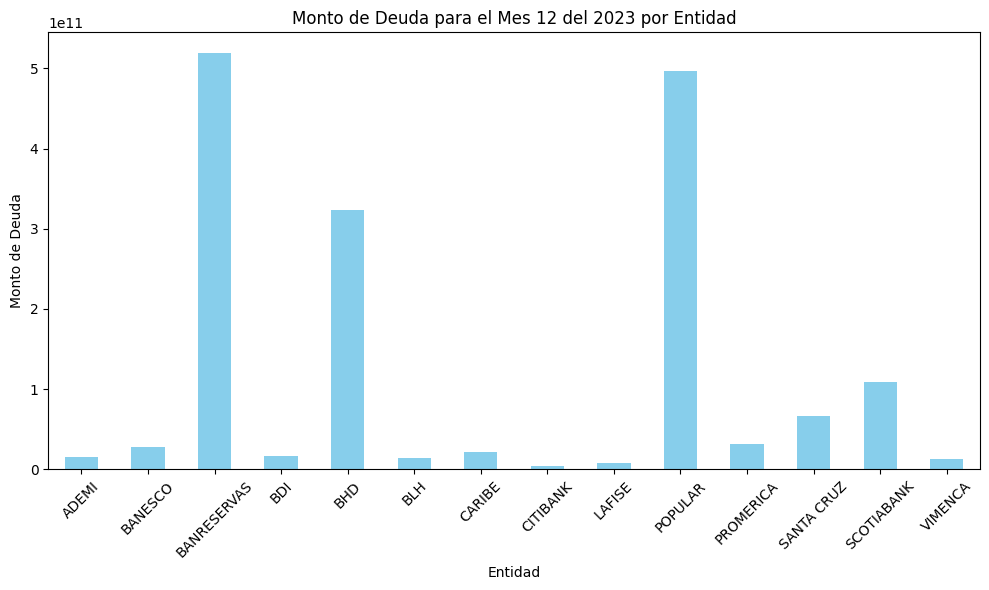

In [20]:

registros['periodo'] = pd.to_datetime(registros['periodo'])

registros_diciembre_2023 = registros[(registros['periodo'].dt.year == 2023) & (registros['periodo'].dt.month == 12)]


deuda_por_entidad_diciembre_2023 = registros_diciembre_2023.groupby('entidad')['deuda'].sum()


fig, ax = plt.subplots(figsize=(10, 6))
deuda_por_entidad_diciembre_2023.plot(kind='bar', ax=ax, color='skyblue')
ax.set_title('Monto de Deuda para el Mes 12 del 2023 por Entidad')
ax.set_xlabel('Entidad')
ax.set_ylabel('Monto de Deuda')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### c. En un grafico circular realizar la morosidad para cada tipo de producto para el año 2023 y el mes 12



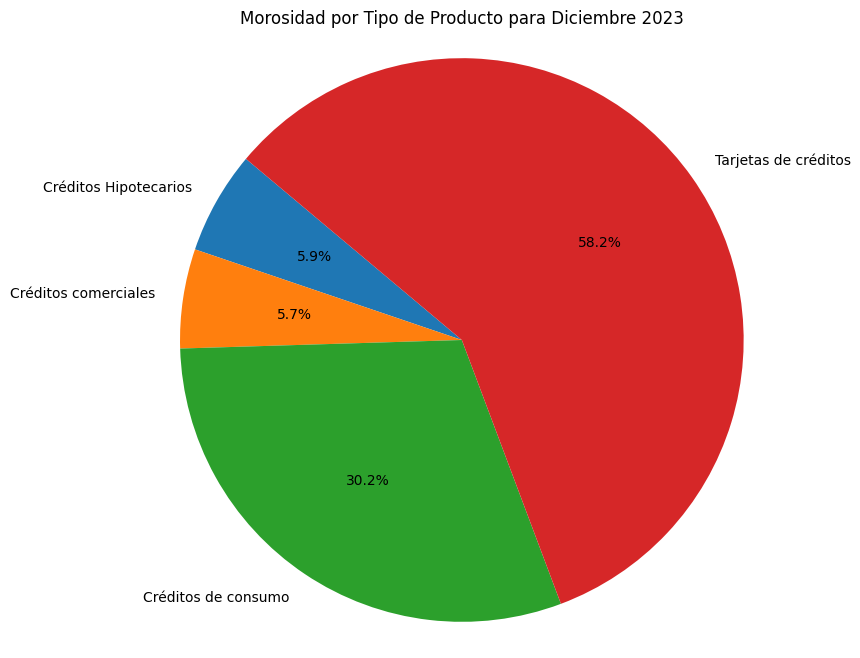

In [21]:

registros['periodo'] = pd.to_datetime(registros['periodo'])


registros_diciembre_2023 = registros[(registros['periodo'].dt.year == 2023) & (registros['periodo'].dt.month == 12)]

morosidad_por_producto = registros_diciembre_2023.groupby('tipoCartera')[['deudaVencida', 'deuda']].sum()
morosidad_por_producto['morosidad'] = morosidad_por_producto['deudaVencida'] / morosidad_por_producto['deuda']

# Crear un gráfico circular
plt.figure(figsize=(8, 8))
plt.pie(morosidad_por_producto['morosidad'], labels=morosidad_por_producto.index, autopct='%1.1f%%', startangle=140)
plt.title('Morosidad por Tipo de Producto para Diciembre 2023')
plt.axis('equal')  
plt.show()

##### d. Crear un gráfico de líneas con los balances de deuda para los años completos 2022 y 2023 para ver la evolución de las carteras


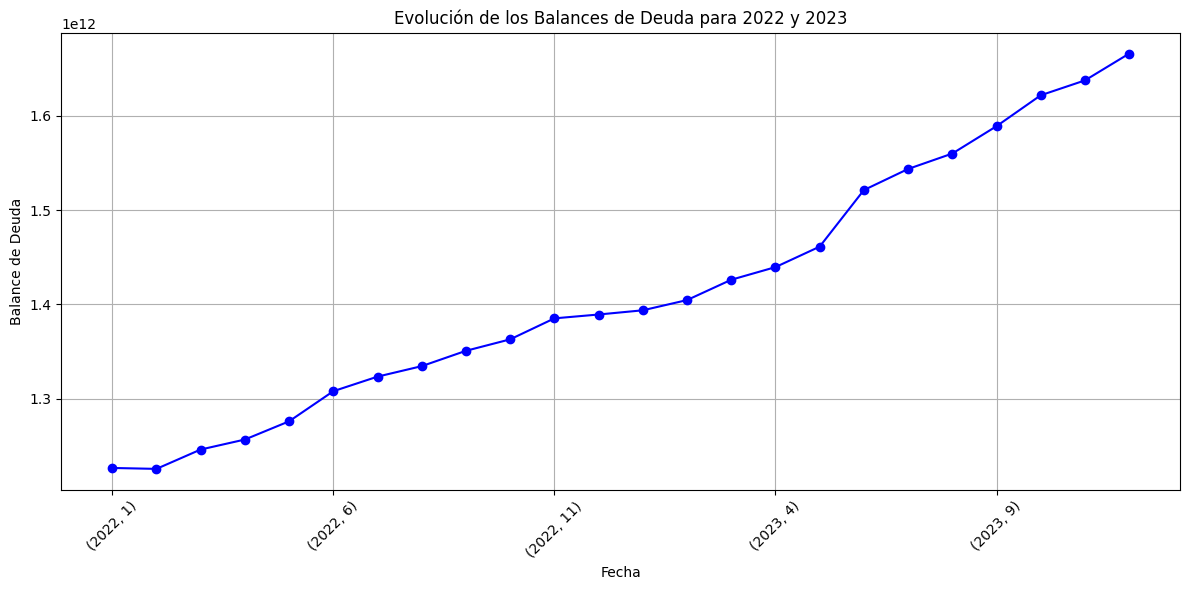

In [23]:
registros['periodo'] = pd.to_datetime(registros['periodo'])


registros_2022_2023 = registros[(registros['periodo'].dt.year >= 2022) & (registros['periodo'].dt.year <= 2023)]


balance_por_anio_mes = registros_2022_2023.groupby([registros_2022_2023['periodo'].dt.year, registros_2022_2023['periodo'].dt.month])['deuda'].sum()


plt.figure(figsize=(12, 6))
balance_por_anio_mes.plot(marker='o', linestyle='-', color='b')
plt.title('Evolución de los Balances de Deuda para 2022 y 2023')
plt.xlabel('Fecha')
plt.ylabel('Balance de Deuda')
plt.grid(True)
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()



#### 11- Realizar un informe el cual nos diga según todo lo que analizo anteriormente que ocurrió durante estos periodos 2022-2023



El Informe sera entregado en un pdf en el virtual y por este link : https://itlaedudo-my.sharepoint.com/:b:/g/personal/202010676_itla_edu_do/EckcU4Ms3QtGkkxiOGuA0PMB80I4tICwWK1b_aJlGUPbLA?e=9unzHU